# Rを試してみよう！

以下の指示どおりやってみてください。なんとなくRの雰囲気がつかめるかもしれません。

ここでは、In [x]:の横のボックスをセルと呼びます。Rで実行するには、セル内のテキストをコピー＆ペーストして実行してください。

In [1]:
5 + 5

[1] 10

まあ、こんな電卓的な使い方はしないと思います。次にいきましょう。

In [2]:
a <- 5 + 5

何も表示されません。以下のセルを実行してください。

In [3]:
a

[1] 10

「a <- 5 + 5」で、「a」という変数に答えが入力されました。

以下のセルを実行してください。

In [4]:
ls()

[1] "a"

先ほど、aを変数と表現しましたが、Rではオブジェクトと言います。  
変数、ユーザー定義関数などの全てが、オブジェクトとして管理されます。

ls() は、オブジェクトのリストを表示してくれる関数です。

さていきなりですが、統計解析のソフトにおいて、「データの入出力をどうするか？」は非常に重要なポイントになります。

以下のセルを実行してください。

In [5]:
# クリップボードから読み込むユーザー定義関数
read.cl<-function(header=T)
{
        read.delim("clipboard",header)
}

In [6]:
# クリップボードに書き込むユーザー定義関数
write.cl<-function(obj=NULL, header=T)
{
      write.table(obj, "clipboard", col.names=header, row.names=F, quote=F, sep="\t")
}

これら2つの関数は、Rのオブジェクトの内容をクリップボードにコピーしたり、クリップボードからRにペーストする関数です。

以降、クリップボード経由でデータのやり取りをしようというわけです。

In [7]:
ls()

[1] "a"        "read.cl"  "write.cl"

read.cl と write.cl が追加されたことが分かります。

In [8]:
write.cl(a)

Microsoft ExcelやLibreOffice Calcなどがあれば、起動してください。右クリックで「貼り付け」してみてください。  
オブジェクトaの内容をExcelなどに貼り付けることができたのではないでしょうか？
 
[こちら](Let_us_try_R_data01.csv)のCSVファイルをダウンロードしてExcelなどで開いてください。  
A1～D10までを選択して、右クリックで「コピー」して下さい。

以下のセルを実行してください。

In [11]:
b <- read.cl()
b

X,Y,Type
1,1,A
2,3,A
4,5,A
10,10,B
6,15,C
1,5,B
5,20,A
3,4,C
15,20,D


データがRに取り込まれたのではないでしょうか？

しかし、このクリップボードによるデータのやり取りでは、すぐに上限に達してしまいます。  
write.clは数百行、read.clは、数万行のデータが可能です。  
なぜこうなるのかは不勉強でよくわかりません。

実際のやり取りではcsvファイルなどを経由してやり取りすることになると思います。  
read.csv()、write.csv()などを使います。こちらは、メモリーの許す限り読み書き可能なはずです。

# グラフを描画してみましょう

さてデータを取り込めたのでグラフ描画してみましょう。

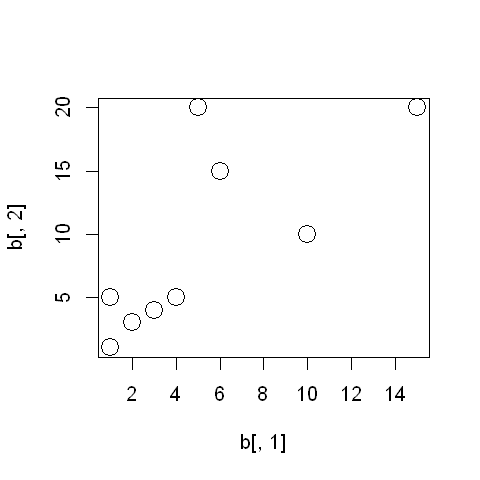

In [12]:
options(repr.plot.width=4, repr.plot.height=4) # グラフの大きさを調整します（エラー出た場合は無視してください）
plot(b[,1], b[,2], cex=2)

グラフが表示されましたね。b[row, col]において、rowはエクセルで言う行番号、colは列番号を示します。  
b[, N]は、列を一度に選択しています。  
plot(x, y)はグラフ描画のコマンドで、xはx軸、yはy軸を示しています。

以下を実行してください。

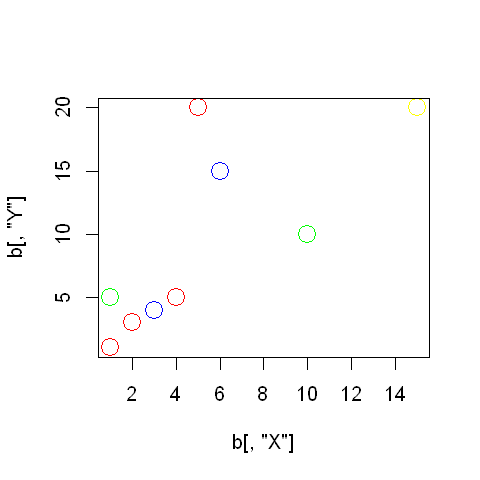

In [13]:
plot(b[,"X"], b[,"Y"], col=c("red", "green", "blue", "yellow")[unclass(b[,"Type"])], cex=2)

Typeで色分けされたグラフが表示されたと思います。

b[row, col]において、rowやcolは名前で指定することも可能です。

plot関数にはさまざまなオプションがあります。  
cex=はドットの大きさを指定します。デフォルトは1です。  
col=は色の指定でそれぞれのType列に対応する色でプロットしています。  

このグラフをエクセルで書かせようと思うと、結構めんどくさいし、多分応用がききません。（ABCD別々にプロットさせるかな・・・）

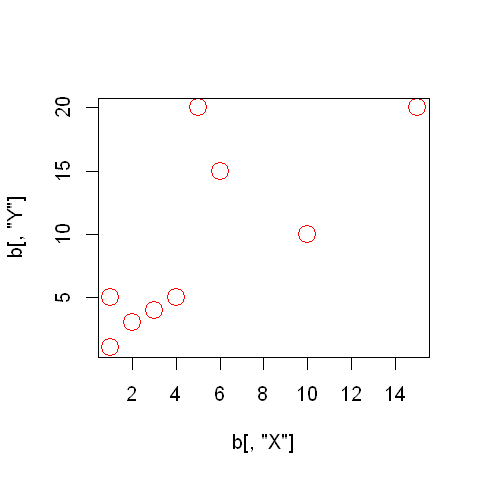

In [14]:
plot(b[,"X"], b[,"Y"], col=2, cex=2)

とすれば全て赤色でプロットします。  
色は数値でも、色名でも指定できます。

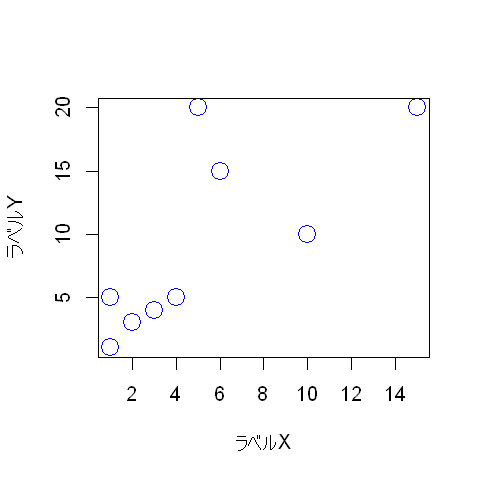

In [15]:
plot(b[,"X"], b[,"Y"], col="blue", cex=2, xlab="ラベルX", ylab="ラベルY")

色名で指定しました。  
xlab=、ylab=はラベル名の設定。

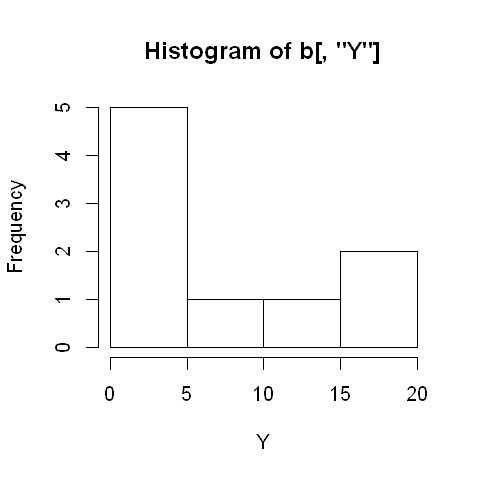

In [16]:
hist(b[,"Y"], xlab="Y")

ヒストグラムも書けます。Excelにはないですね。

さらに、こんなのはどうでしょう？

In [17]:
c <- subset(b, b[,"X"]>=3 & b[,"X"]<=6)
c

,X,Y,Type
3,4,5,A
5,6,15,C
7,5,20,A
8,3,4,C


subset(データ, 条件)はデータからある条件の数値だけ抽出する関数です。  
列Xの中で3～6のものだけ抽出しました。

さらにこうすると、

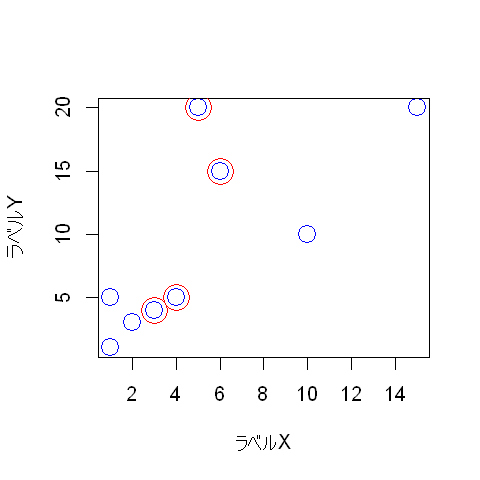

In [18]:
plot(b[,"X"], b[,"Y"], col="blue", cex=2, xlab="ラベルX", ylab="ラベルY")
points(c[,"X"], c[,"Y"], col="red", cex=3)

抽出したデータだけを追加描画できました。

# どうです？

エクセルよりデータが良く見えてきませんか？  
Rは、統計解析だけではなくデータマイニング（データの可視化）という分野にも良くでてきます。

パッケージを追加することで、3Dグラフの描画、クラスタ分析、画像の読み込み、データベース連携などにも対応できます。  
処理速度もスクリプト言語にしては早いのではないでしょうか。

# ちなみに

本ページは、IRkernel が組み込まれた The jupyter notebook を使って作成しました。

ipynbファイルは、[こちら](https://github.com/WAKU-TAKE-A/RTips)のLet_us_try_R.ipynbです。ダウンロードして、IRkernel が組み込まれた The jupyter notebook にアップロードすれば、実行も編集もできます。

IRkernelの組み込み方は、[こちら](https://nbviewer.jupyter.org/github/waku-take-a/JupyterTips/blob/master/Install_of_IRkernel.ipynb)を参照してください。

----
※1  
write.clやread.clは、タブ区切りのデータのやり取りを行うことができます。
あと、オプションがあります。  
a<-read.cl(header=FALSE)とすればヘッダーなしでオブジェクトaに読み込みます。  
write.cl(b,header=FALSE)とすればオブジェクトbをヘッダーなしでクリップボードに書き込みます。  
デフォルトはともにTRUEになってます。  

----
[ホームへ](https://waku-take-a.github.io/index.html)  
[↑Rの記事Topへ](https://waku-take-a.github.io/R.html)  

※  
上記のipynbファイル等は、[こちらに](https://github.com/WAKU-TAKE-A/RTips)あります。  
解凍後、`The jupyter notebook`にアップロードすれば、ローカルな環境で実行することも、編集することもできます。

<(_ _)>